c:
[ 3.23842240e+00 -5.00150568e+00  4.21305367e+00 -2.87593031e+00
  1.45715485e+00 -4.68737042e-01  2.64143764e-02  6.50652311e-02
 -3.67519296e-02  9.11538812e-03 -9.05920871e-04]

detGn+1 = -3.52511944999125e-46

nu = 4.06688338515089e+19

rn(1.0384615384615385) = 7.186642367873475e-07
rn(1.5384615384615385) = -1.7353369956285558e-07
rn(1.9384615384615385) = 5.179432483737312e-07

Expected deficiency: 8.670296769786819e-07
Real deficiency on whole interval: 7.187007717845972e-07

Real deficiency on control points: 7.186642367873475e-07


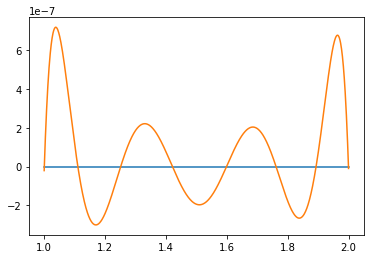

In [3]:
import numpy as np
from math import exp, log, sqrt
import matplotlib.pyplot as plt

a = 1.0
b = 2.0
N = 10
delta = (b - a) / N
alpha = 1.7

points = [a + i * delta for i in range(N + 1)]
c = np.zeros((N + 1, 1))

def l2scalar(f, g):
    values = [f(point) * g(point) for point in points]
    return np.sum(np.array(values, dtype=np.double))

def l2norm(f):
    return l2scalar(f, f)

def f(x):
    return alpha * exp(-x) + (1 - alpha) * log(x)

def phi(i):
    if i == N + 1:
        return f
    return lambda x: x ** i

def getPhi(c):
    phi = "ф(x) = "
    for i in range(len(c)):
        if c[i] < 0:
            phi += "- " + str(abs(c[i]))
        else:
            if i != 0:
                phi += "+ "
            phi += str(c[i])
        if i != 0:
            phi += "x"
            if i != 1:
                phi += "^" + str(i)
        phi += " "
    return phi

def solution(x):
    global c
    value = 0.0
    for i in range(len(c)):
        value += c[i] * phi(i)(x)
    return value

def plotDifference(samples):
    space = np.linspace(a, b, samples)
    plt.plot(space, np.zeros(np.shape(space)))
    plt.plot(space, np.array([solution(x) - f(x) for x in space], dtype=np.double))
    plt.savefig("lsqDiff.png")
    plt.show()
    
if __name__ == '__main__':
    A = np.array([[l2scalar(phi(i), phi(j)) for j in range(N + 1)] for i in range(N + 1)],
                 dtype = np.double)
    B = np.array([l2scalar(f, phi(i)) for i in range(N + 1)], dtype = np.double)
    c = np.linalg.solve(A, B)

    print("c:\n" + str(c))
    print()

    check = [points[0] + delta / 2.6, 
             points[5] + delta / 2.6,
             points[9] + delta / 2.6]
    
    detGN1 = np.linalg.det(A)
    print("detGn+1 = " + str(detGN1))
    print()
    print("nu = " + str(np.linalg.norm(A, ord=np.inf) * np.linalg.norm(np.linalg.inv(A), ord=np.inf)))
    print()
    A = np.concatenate((A, np.array([B]).T), axis=1)
    A = np.vstack((A, np.array([l2scalar(f, phi(i)) for i in range(N + 2)], dtype=np.double)))
    detGN2 = np.linalg.det(A)
    
    
    [print("rn({0}) = {1}".format(x, solution(x) - f(x))) for x in check]
    print()
    
    print("Expected deficiency: " + 
          str(sqrt(abs(detGN2 / detGN1))))
    
    space = np.linspace(a, b, 1000)
    print("Real deficiency on whole interval: " + 
          str(np.max(np.abs(np.array([(solution(x) - f(x)) for x in space], dtype=np.double)))))
    print()
    
    print("Real deficiency on control points: " + 
          str(np.max(np.abs(np.array([(solution(x) - f(x)) for x in check], dtype=np.double)))))
    
    plotDifference(1000)